# Visualization of experimental results

## Imports

In [1]:
from eval_utils import *
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

# set rcParams to default values
plt.rcdefaults()

# # use LaTeX fonts in the plot
# plt.rc('text', usetex=True)
# plt.rc('font', family='serif')

## Loading and preparing statistics

### Main configuration

In [2]:
eval_method = 'tOBT'
groupby = 'SetSize'

### Table preparation

In [3]:
# Setup paths
stats_dir = "/Users/duculet/Thesis/NewWork/RecommenderServer/evaluation/python/statistics/general/"

# Load data
df_baseline = load_stats(stats_dir, "base_TT")
df_FF = load_stats(stats_dir, eval_method + "_FF")
df_TF = load_stats(stats_dir, eval_method + "_TF")
df_FT = load_stats(stats_dir, eval_method + "_FT")
df_TT = load_stats(stats_dir, eval_method + "_TT")

# Extend information
df_baseline["Recommender"] = "Baseline"
df_FF["Recommender"] = "No Type Info (FF)"
df_TF["Recommender"] = "Object Type Info (TF)"
df_FT["Recommender"] = "Subject Type Info (FT)"
df_TT["Recommender"] = "Full Type Info (TT)"

# Concatenate data
df_table = pd.concat([
    df_baseline,
    df_FF,
    df_TF,
    df_FT,
    df_TT
])

### General settings

In [4]:
# Setup paths
stats_dir = "/Users/duculet/Thesis/NewWork/RecommenderServer/evaluation/python/statistics/full/"

# Load data
df_baseline = load_stats(stats_dir, "base_TT")
df_FF = load_stats(stats_dir, eval_method + "_FF")
df_TF = load_stats(stats_dir, eval_method + "_TF")
df_FT = load_stats(stats_dir, eval_method + "_FT")
df_TT = load_stats(stats_dir, eval_method + "_TT")

# Extend information
df_baseline["Recommender"] = "Baseline"
df_FF["Recommender"] = "No Type Info (FF)"
df_TF["Recommender"] = "Object Type Info (TF)"
df_FT["Recommender"] = "Subject Type Info (FT)"
df_TT["Recommender"] = "Full Type Info (TT)"

# Concatenate data
df_combined = pd.concat([
    df_baseline,
    df_FF,
    df_TF,
    df_FT,
    df_TT
])

# Filter out aggregated data
aggregated = df_combined[df_combined['Pos'] == -1]
df_combined = df_combined[df_combined['Pos'] != -1]

# Cutoff at the max number of transactions for all recommender systems
max_size = min(df_baseline.shape[0], df_FF.shape[0], df_TF.shape[0], df_FT.shape[0], df_TT.shape[0]) - 1
df_combined = df_combined[df_combined['Pos'] <= max_size]

In [5]:
display(df_combined.head())

,Mean,Top1,Top5,Top10,Pos,Recommender
1,4.2398,40.8163,81.6327,88.2653,0.0,Baseline
2,1.1010,93.4343,100.0000,100.0000,1.0,Baseline
3,2.3792,54.5833,92.5000,97.7500,2.0,Baseline
4,1.7347,41.8367,100.0000,100.0000,3.0,Baseline
5,1.0050,99.5050,100.0000,100.0000,4.0,Baseline


### Grouped settings

In [6]:
# Setup paths
stats_dir = "/Users/duculet/Thesis/NewWork/RecommenderServer/evaluation/python/statistics/full/"

# Load data
df_baseline_grouped = load_stats(stats_dir, "base_TT_" + groupby)
df_FF_grouped = load_stats(stats_dir, eval_method + "_FF_" + groupby)
df_TF_grouped = load_stats(stats_dir, eval_method + "_TF_" + groupby)
df_FT_grouped = load_stats(stats_dir, eval_method + "_FT_" + groupby)
df_TT_grouped = load_stats(stats_dir, eval_method + "_TT_" + groupby)

# Extend information
df_baseline_grouped["Recommender"] = "Baseline"
df_FF_grouped["Recommender"] = "No Type Info (FF)"
df_TF_grouped["Recommender"] = "Object Type Info (TF)"
df_FT_grouped["Recommender"] = "Subject Type Info (FT)"
df_TT_grouped["Recommender"] = "Full Type Info (TT)"

# Concatenate data
df_grouped_combined = pd.concat([
    df_FF_grouped,
    df_TF_grouped,
    df_FT_grouped,
    df_TT_grouped
])

# Filter aggregated columns
group = df_grouped_combined.columns[0]
aggregated = df_grouped_combined[df_grouped_combined[group] == -1]
df_grouped_combined = df_grouped_combined[df_grouped_combined[group] >= 0]

# Only keep relevant rows (ones that go up to the common max size)
max_size_grouped = min(
    df_FF_grouped[group].max(), 
    df_TF_grouped[group].max(), 
    df_FT_grouped[group].max(), 
    df_TT_grouped[group].max()
    )
df_grouped_combined = df_grouped_combined[df_grouped_combined[group] <= max_size_grouped]

# Extract the counts
counts = df_grouped_combined.groupby(group).sum().reset_index()[[group, "Count"]]

In [7]:
display(df_grouped_combined.tail())

,SetSize,Count,Mean,Top1,Top5,Top10,Recommender
11,11,8009,2.3072,79.7938,93.9012,96.5692,Full Type Info (TT)
12,12,3146,3.2749,74.3100,91.1078,93.3702,Full Type Info (TT)
13,13,3298,2.8369,76.3003,91.3367,95.8472,Full Type Info (TT)
14,14,1656,2.7479,66.2483,87.3290,96.0113,Full Type Info (TT)
15,15,1006,2.3949,75.9421,91.4135,97.1455,Full Type Info (TT)


## Visualization of the results

### Plotting general statistics

/Users/duculet/Thesis/NewWork/RecommenderServer/.conda/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/duculet/Thesis/NewWork/RecommenderServer/.conda/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/duculet/Thesis/NewWork/RecommenderServer/.conda/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


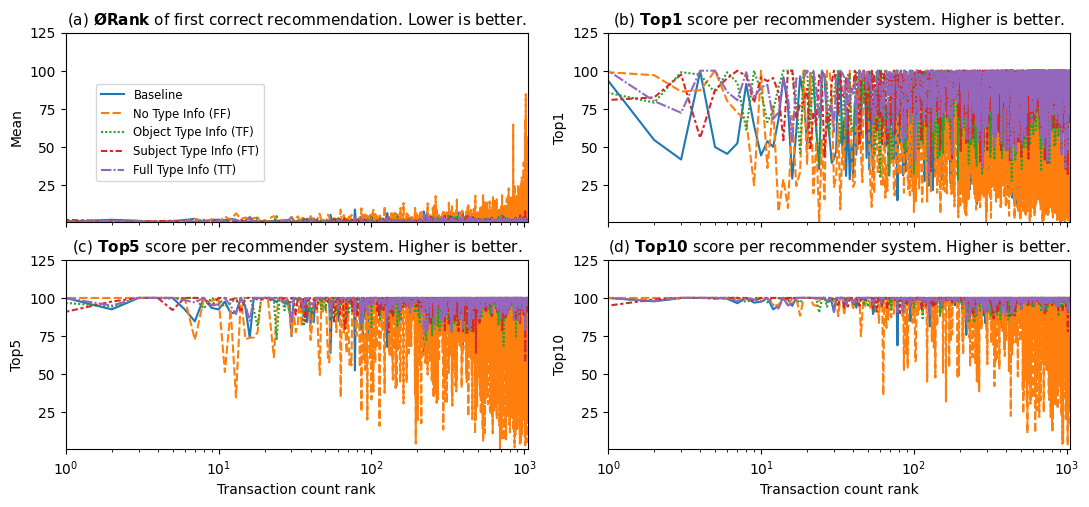

In [8]:
# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(11, 5), sharex=True)

for ax, column in zip(axes.flat, df_combined[["Mean", "Top1", "Top5", "Top10"]]):
    sns.lineplot(
        x='Pos', 
        y=column, 
        hue="Recommender",
        data=df_combined, 
        style="Recommender",
        ax=ax,
    )
    # set x label to position
    ax.set_xlabel("Transaction count rank")
    # ax.loglog()
    ax.set_xscale('log')
    ax.set_xlim(1, max_size)
    ax.set_ylim(1, 125)
    ax.get_legend().remove()

f.tight_layout()

handles, labels = ax.get_legend_handles_labels()
f.legend(handles, labels, loc='lower right', bbox_to_anchor=(0.25, 0.65), fontsize='small')

labels = [
    r'(a) $\mathbf{ØRank}$ of first correct recommendation. Lower is better.',
    r'(b) $\mathbf{Top1}$ score per recommender system. Higher is better.',
    r'(c) $\mathbf{Top5}$ score per recommender system. Higher is better.',
    r'(d) $\mathbf{Top10}$ score per recommender system. Higher is better.',
]
for ax, label in zip(axes.flat, labels):
    ax.set_title(label, fontsize=11)

plt.subplots_adjust(hspace=0.2)

### Plotting grouped statistics

(0.0, 20.0)

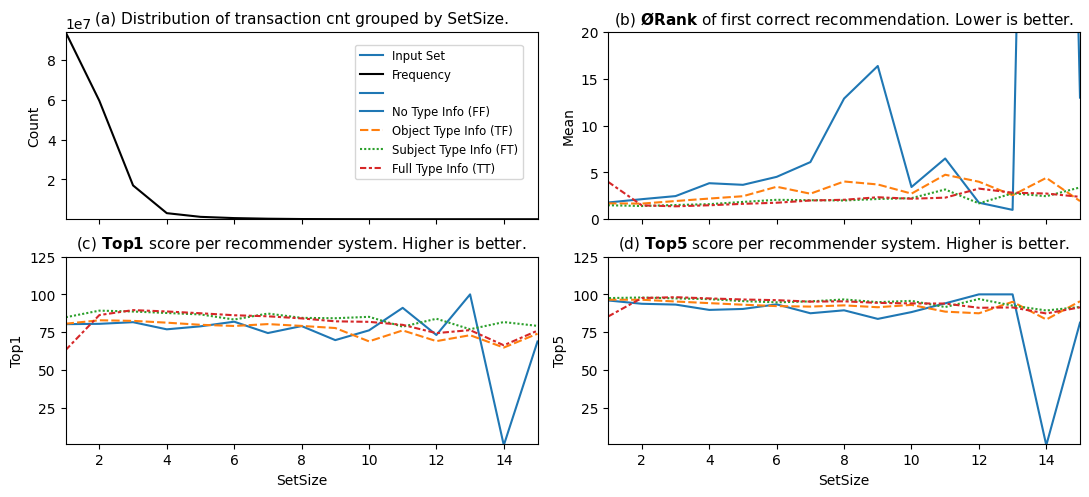

In [9]:
# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(11, 5), sharex=True)

ax = axes.flat[0]
ax.set_xlim(1, counts[group].max())
# ax.loglog()
ax.set_ylim(1, counts["Count"].max())
cline = sns.lineplot(
    x=counts[group], 
    y=counts["Count"],
    data=counts,
    color="black",
    ax=ax,
)

for axx, column in zip(axes.flat[1:], df_grouped_combined[["Mean", "Top1", "Top5"]]):
    sns.lineplot(
        x=group, 
        y=column, 
        hue="Recommender",
        data=df_grouped_combined, 
        style="Recommender",
        ax=axx,
    )
    axx.set_xlim(1, max_size_grouped)
    axx.set_ylim(1, 125)
    axx.get_legend().remove()

f.tight_layout()

handles, labels = axx.get_legend_handles_labels()
handles = [ handles[0], cline.get_lines()[0], handles[0]] + handles
labels  = ['Input Set', 'Frequency',''] + labels
f.legend(handles, labels, loc='center right', bbox_to_anchor=(0.485, 0.78), fontsize='small')

labels = [
    r'(a) Distribution of transaction cnt grouped by SetSize.',
    r'(b) $\mathbf{ØRank}$ of first correct recommendation. Lower is better.',
    r'(c) $\mathbf{Top1}$ score per recommender system. Higher is better.',
    r'(d) $\mathbf{Top5}$ score per recommender system. Higher is better.',
]
for ax, label in zip(axes.flat, labels):
    ax.set_title(label, fontsize=11)

plt.subplots_adjust(hspace=0.2)
axes.flat[1].set_ylim(0, 20)

### Tabular representation of the results

In [10]:
# The duration column is not needed
df_table = df_table.drop('Duration', axis=1)

# change order of columns
# the recommender column should be first
cols = df_table.columns.tolist()
cols = cols[-1:] + cols[:-1]
df_table = df_table[cols]

# Display table normally
display(df_table)

# Display table in latex format
print(tabulate(df_table, headers='keys', numalign='center', tablefmt='latex', showindex=False))

,Recommender,Mean,Median,StdDev,Top1,Top5,Top10,Missing
0,Baseline,1.8320,1.4962,1.1371,70.6825,96.2079,98.6246,0.0031
0,No Type Info (FF),5.1816,3.1143,7.0066,52.6749,77.4949,87.8853,0.0030
0,Object Type Info (TF),1.4301,1.0972,0.7393,87.6284,97.8587,99.1271,0.0032
0,Subject Type Info (FT),1.3535,1.0812,0.6670,89.7055,98.2256,99.3074,0.0031
0,Full Type Info (TT),1.3132,1.0666,0.5918,91.1623,98.4774,99.3390,0.0031


\begin{tabular}{lccccccc}
\hline
 Recommender            &  Mean  &  Median  &  StdDev  &  Top1   &  Top5   &  Top10  &  Missing  \\
\hline
 Baseline               & 1.832  &  1.4962  &  1.1371  & 70.6825 & 96.2079 & 98.6246 &  0.0031   \\
 No Type Info (FF)      & 5.1816 &  3.1143  &  7.0066  & 52.6749 & 77.4949 & 87.8853 &   0.003   \\
 Object Type Info (TF)  & 1.4301 &  1.0972  &  0.7393  & 87.6284 & 97.8587 & 99.1271 &  0.0032   \\
 Subject Type Info (FT) & 1.3535 &  1.0812  &  0.667   & 89.7055 & 98.2256 & 99.3074 &  0.0031   \\
 Full Type Info (TT)    & 1.3132 &  1.0666  &  0.5918  & 91.1623 & 98.4774 & 99.339  &  0.0031   \\
\hline
\end{tabular}
